In [114]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from stop_words import get_stop_words
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
import re


libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [147]:
events = pd.read_csv('dataframe_features.csv')
events

,Unnamed: 0,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,...,age,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type
0,0,2024-06-01 03:40:58+00:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,...,20,female,0,55.164440,61.436844,2,2024-06-01,05:40:58,morning,weekend
1,1,2024-06-01 16:33:24+00:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,...,40,female,2,54.733334,56.000000,2,2024-06-01,18:33:24,evening,weekend
2,2,2024-06-01 18:30:43+00:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,...,23,male,1,59.937500,30.308611,0,2024-06-01,18:30:43,evening,weekend
3,3,2024-06-01 20:03:42+00:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,...,41,male,3,55.751244,37.618423,0,2024-06-01,20:03:42,evening,weekend
4,4,2024-06-01 19:48:09+00:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,...,38,female,2,55.751244,37.618423,0,2024-06-01,19:48:09,evening,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,1759611,2024-06-30 14:08:36+00:00,Moscow,smartphone,mobile app,Android,Rutube,4230,video_162776,10026914,...,32,female,2,55.751244,37.618423,0,2024-06-30,14:08:36,day,weekend
1759612,1759612,2024-06-29 22:20:16+00:00,Moscow,smartphone,browser,Android,Firefox Mobile,382,video_316157,10417567,...,48,male,3,55.751244,37.618423,0,2024-06-29,22:20:16,evening,weekend
1759613,1759613,2024-06-30 19:37:04+00:00,St.-Petersburg,desktop,browser,Windows,Microsoft Edge,1342,video_83304,10009094,...,28,male,1,59.937500,30.308611,0,2024-06-30,19:37:04,evening,weekend
1759614,1759614,2024-06-30 08:33:09+00:00,St.-Petersburg,smartphone,mobile app,Android,Rutube,801,video_132769,10574374,...,43,female,3,59.937500,30.308611,0,2024-06-30,08:33:09,morning,weekend


In [121]:
len(events.viewer_uid.unique())

180012

In [122]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759616 entries, 0 to 1759615
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   event_timestamp  object 
 2   region           object 
 3   ua_device_type   object 
 4   ua_client_type   object 
 5   ua_os            object 
 6   ua_client_name   object 
 7   total_watchtime  int64  
 8   rutube_video_id  object 
 9   viewer_uid       int64  
 10  title            object 
 11  category         object 
 12  duration         int64  
 13  author_id        int64  
 14  age              int64  
 15  sex              object 
 16  age_class        int64  
 17  latitude         float64
 18  longitude        float64
 19  time_zone        int64  
 20  date             object 
 21  time             object 
 22  time of day      object 
 23  Day Type         object 
dtypes: float64(2), int64(8), object(14)
memory usage: 322.2+ MB


In [148]:
drop_features = ['Unnamed: 0']
events = events.drop(columns=drop_features)

In [99]:
categorial_features = ['region', 'ua_device_type', 'ua_client_type', 'ua_os', 'ua_client_name', 'Day Type', 'time of day', 'time_zone', 'category']
float_features = ['total_watchtime', 'longitude', 'latitude']

<Axes: xlabel='ua_client_name'>

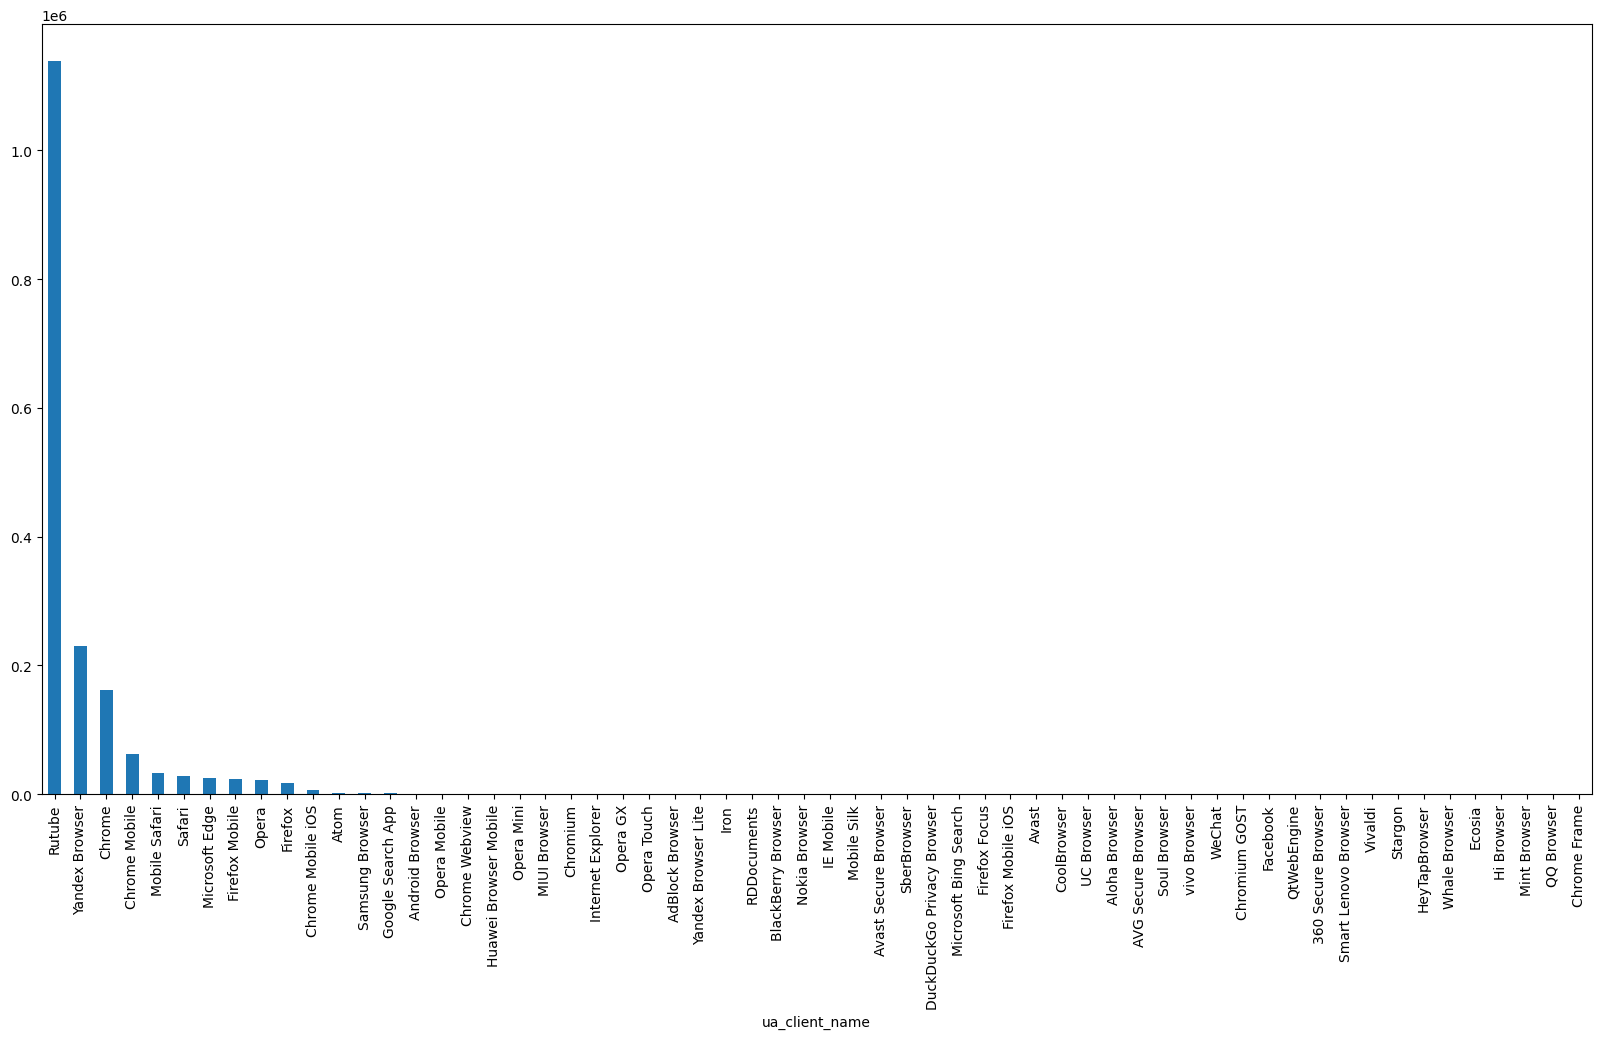

In [4]:
events['ua_client_name'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='region'>

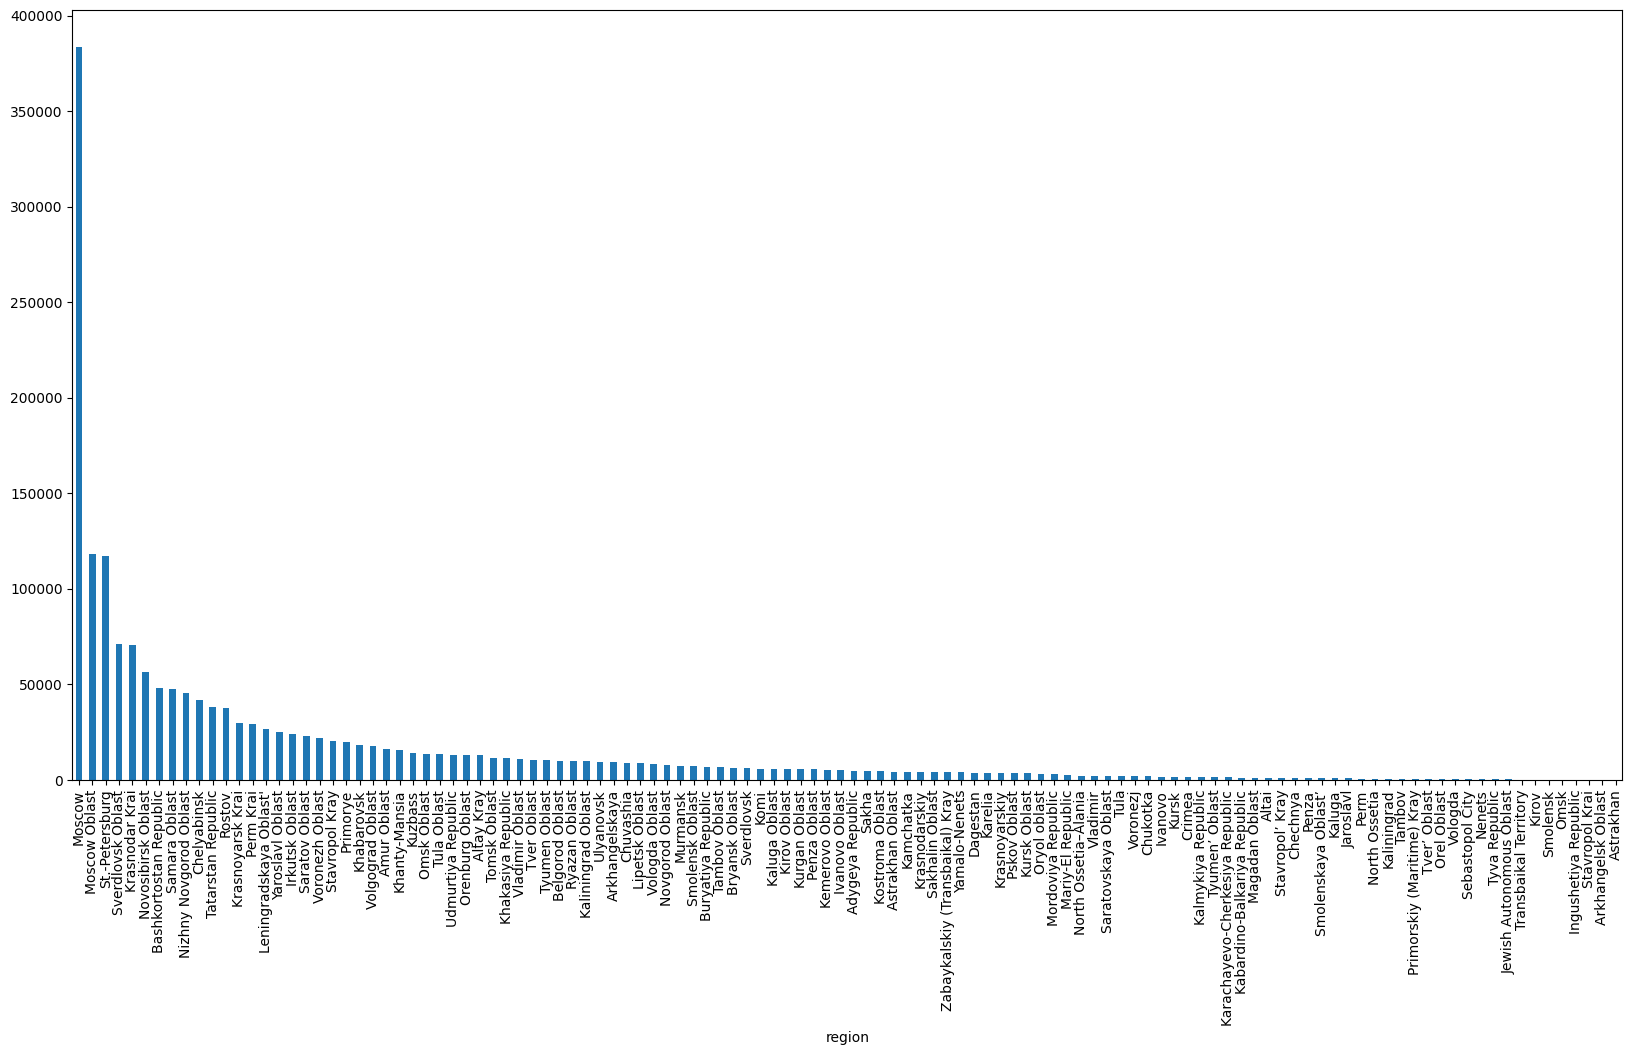

In [5]:
events['region'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='ua_client_type'>

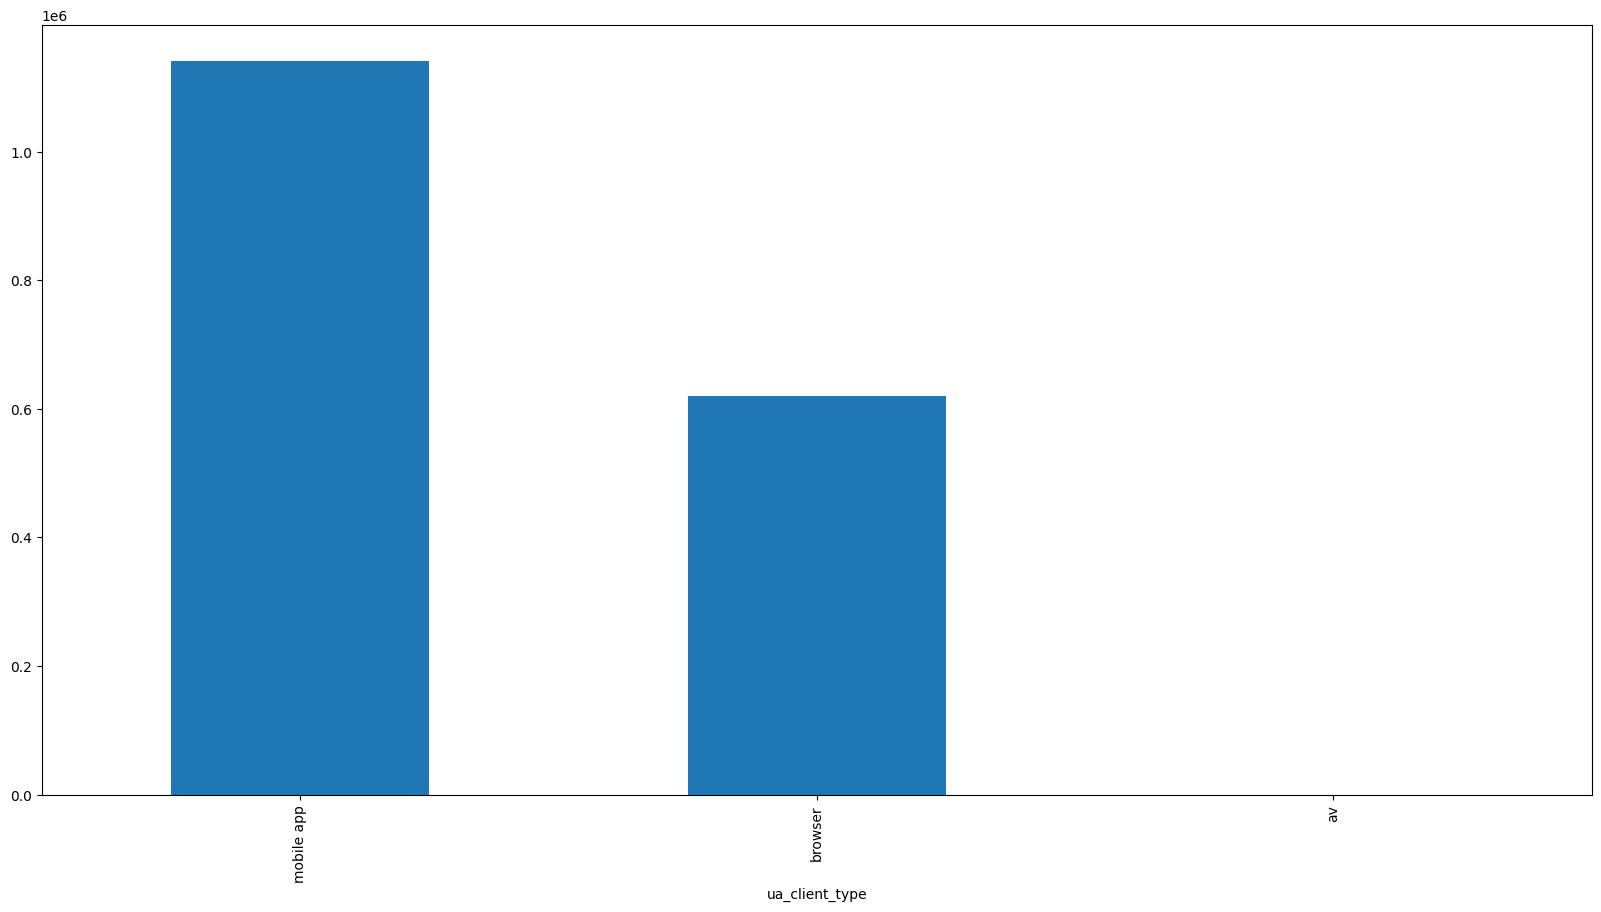

In [6]:
events['ua_client_type'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='ua_os'>

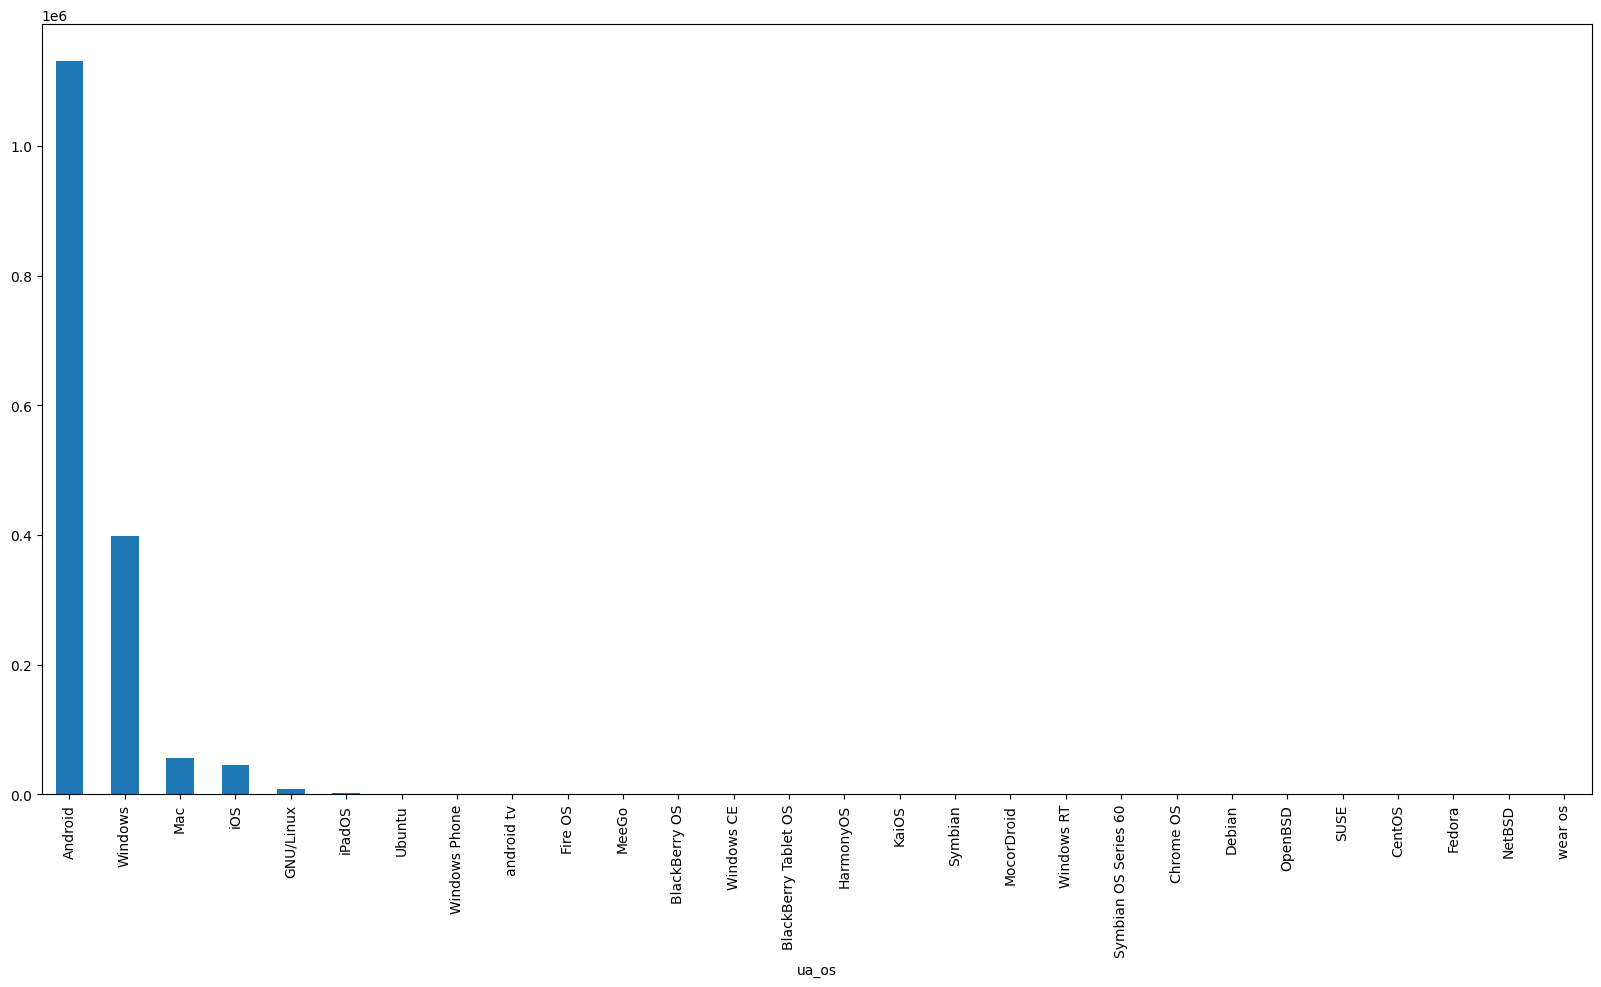

In [10]:
events['ua_os'].value_counts().plot(kind='bar', figsize=(20, 10))

Посмотрим на распределение длин последовательности взаимодействий пользоателя

<Axes: >

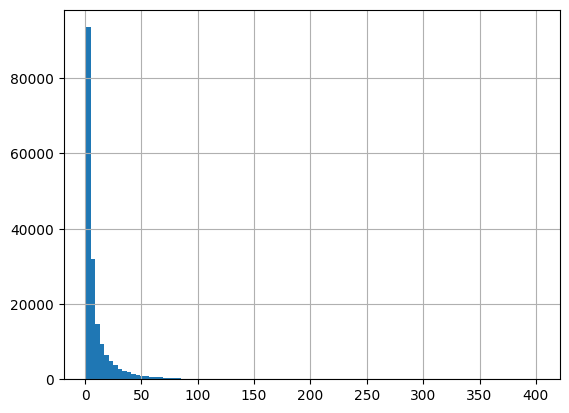

In [33]:
events['viewer_uid'].value_counts().hist(bins=100)

<Axes: ylabel='total_watchtime'>

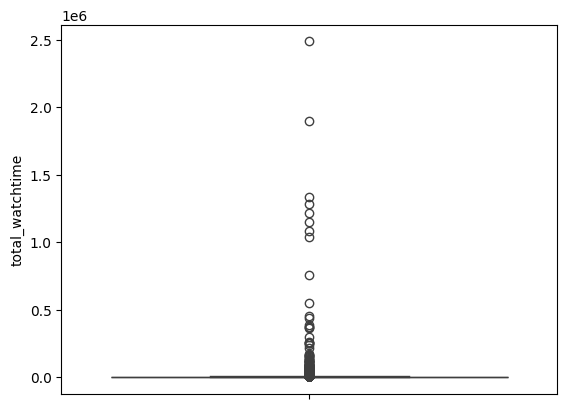

In [12]:
sns.boxplot(events['total_watchtime'])

## Анализ категориальной корреляции

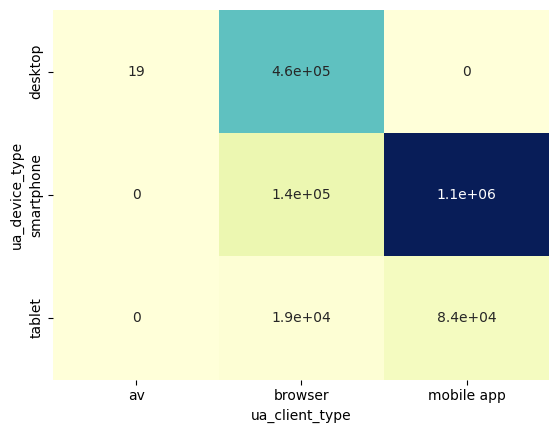

In [8]:
sns.heatmap(pd.crosstab(events['ua_device_type'], events['ua_client_type']), cmap="YlGnBu", annot=True, cbar=False)

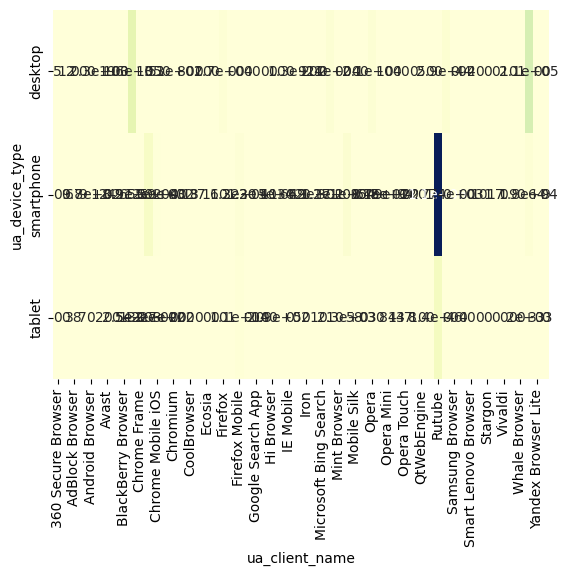

In [13]:
sns.heatmap(pd.crosstab(events['ua_device_type'], events['ua_client_name']), cmap="YlGnBu", annot=True, cbar=False)

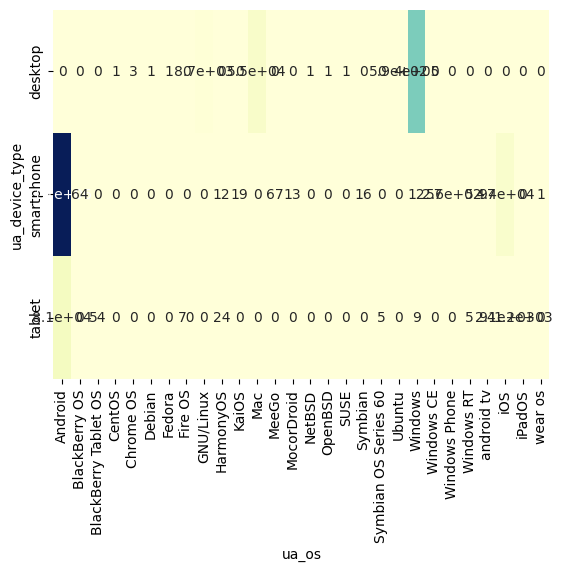

In [14]:
sns.heatmap(pd.crosstab(events['sex'], events['ua_os']), cmap="YlGnBu", annot=True, cbar=False)

Из рассмотренных выше графиков можно заметить, что использование всех четырех фичей избыточно, поэтому мы оставим только две из них

<Axes: xlabel='category', ylabel='age_class'>

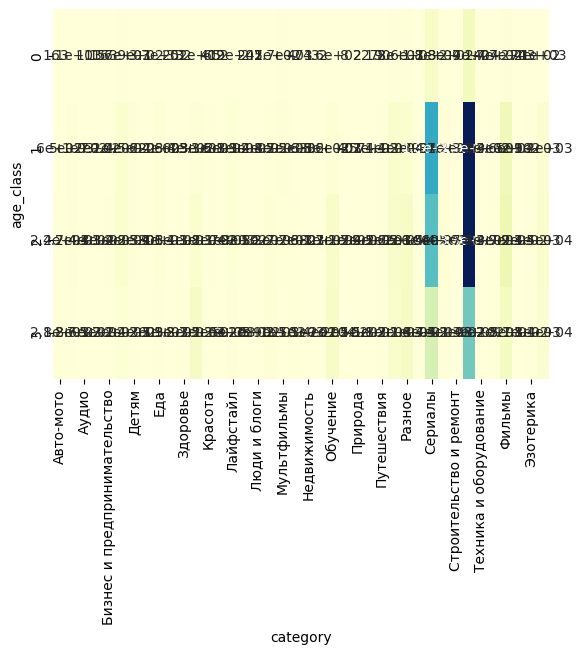

In [103]:
sns.heatmap(pd.crosstab(events['age_class'], events['category']), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='sex', ylabel='age_class'>

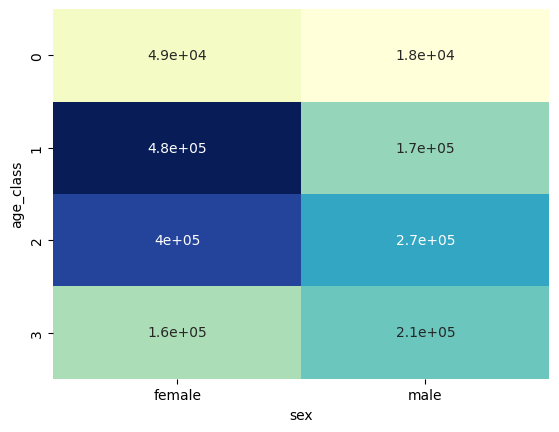

In [104]:
sns.heatmap(pd.crosstab(events['age_class'], events['sex']), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='sex', ylabel='ua_device_type'>

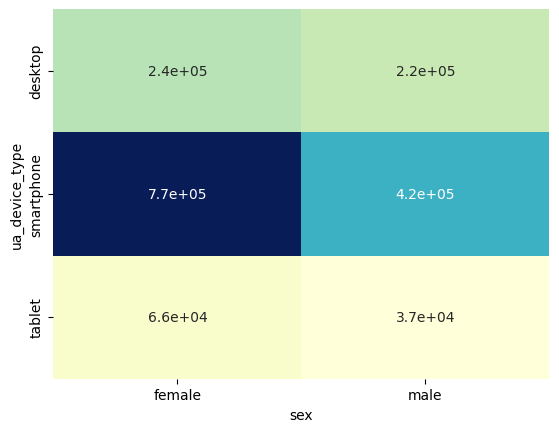

In [105]:
sns.heatmap(pd.crosstab(events['ua_device_type'], events['sex']), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='age_class', ylabel='ua_device_type'>

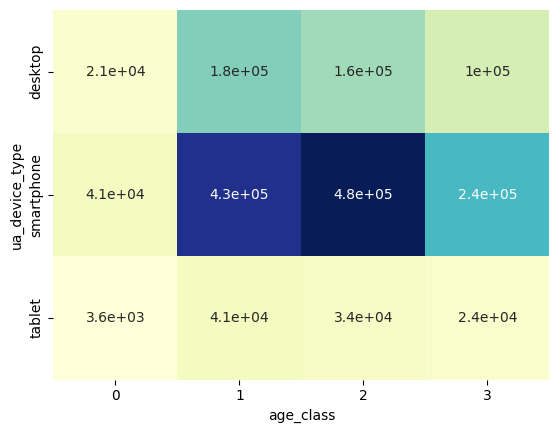

In [106]:
sns.heatmap(pd.crosstab(events['ua_device_type'], events['age_class']), cmap="YlGnBu", annot=True, cbar=False)

## Date

<Axes: xlabel='time of day'>

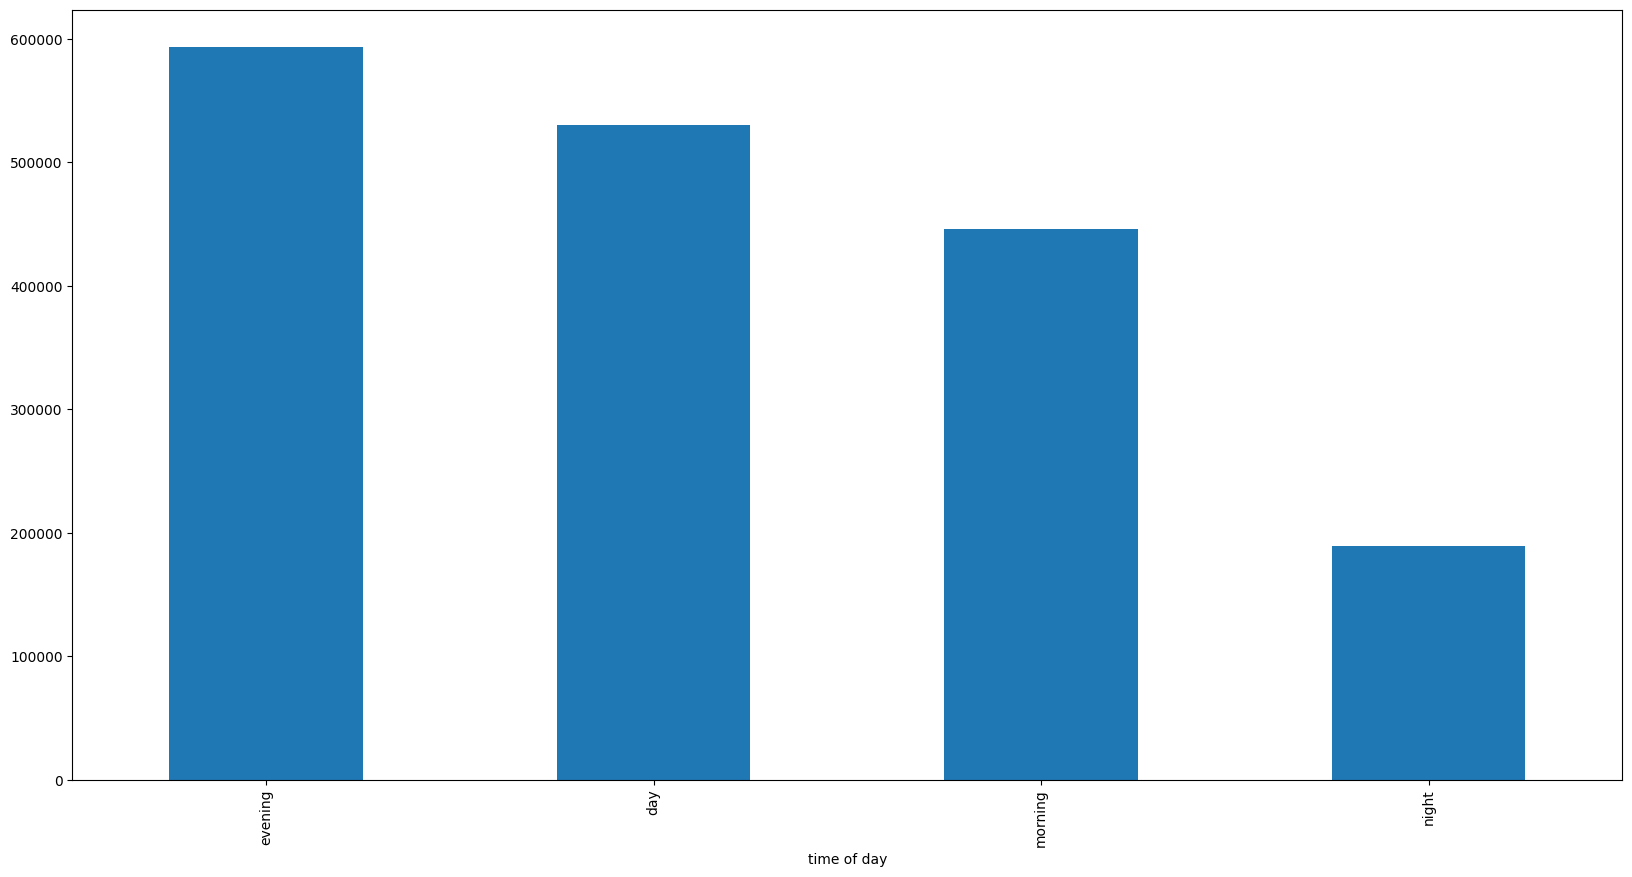

In [100]:
events['time of day'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='Day Type'>

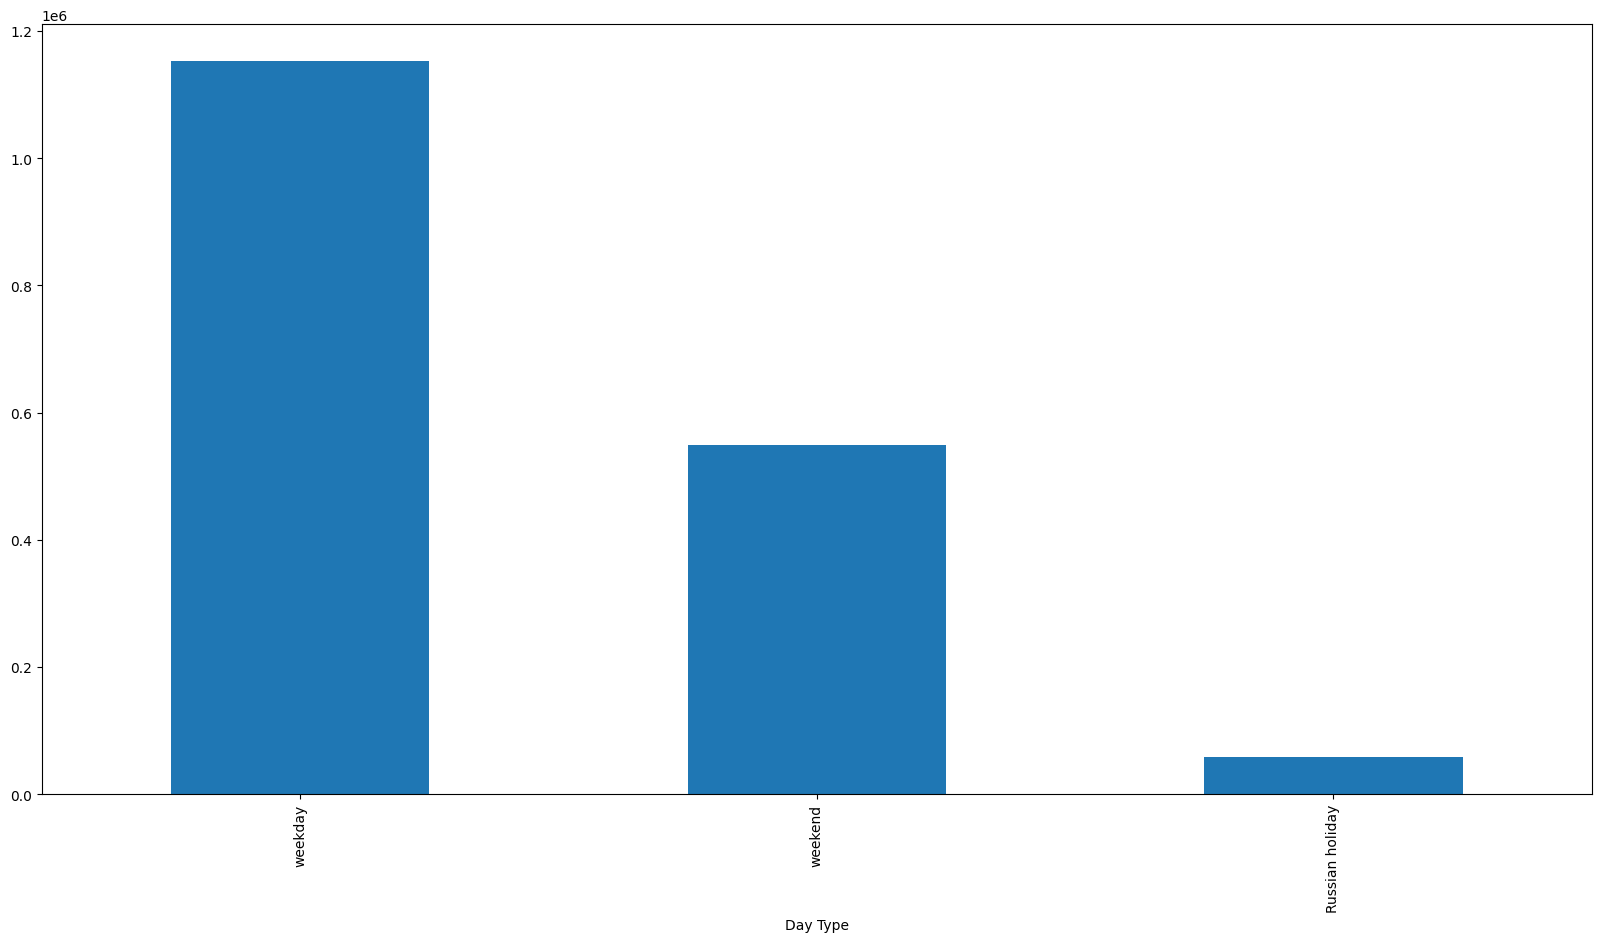

In [101]:
events['Day Type'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='Day Type'>

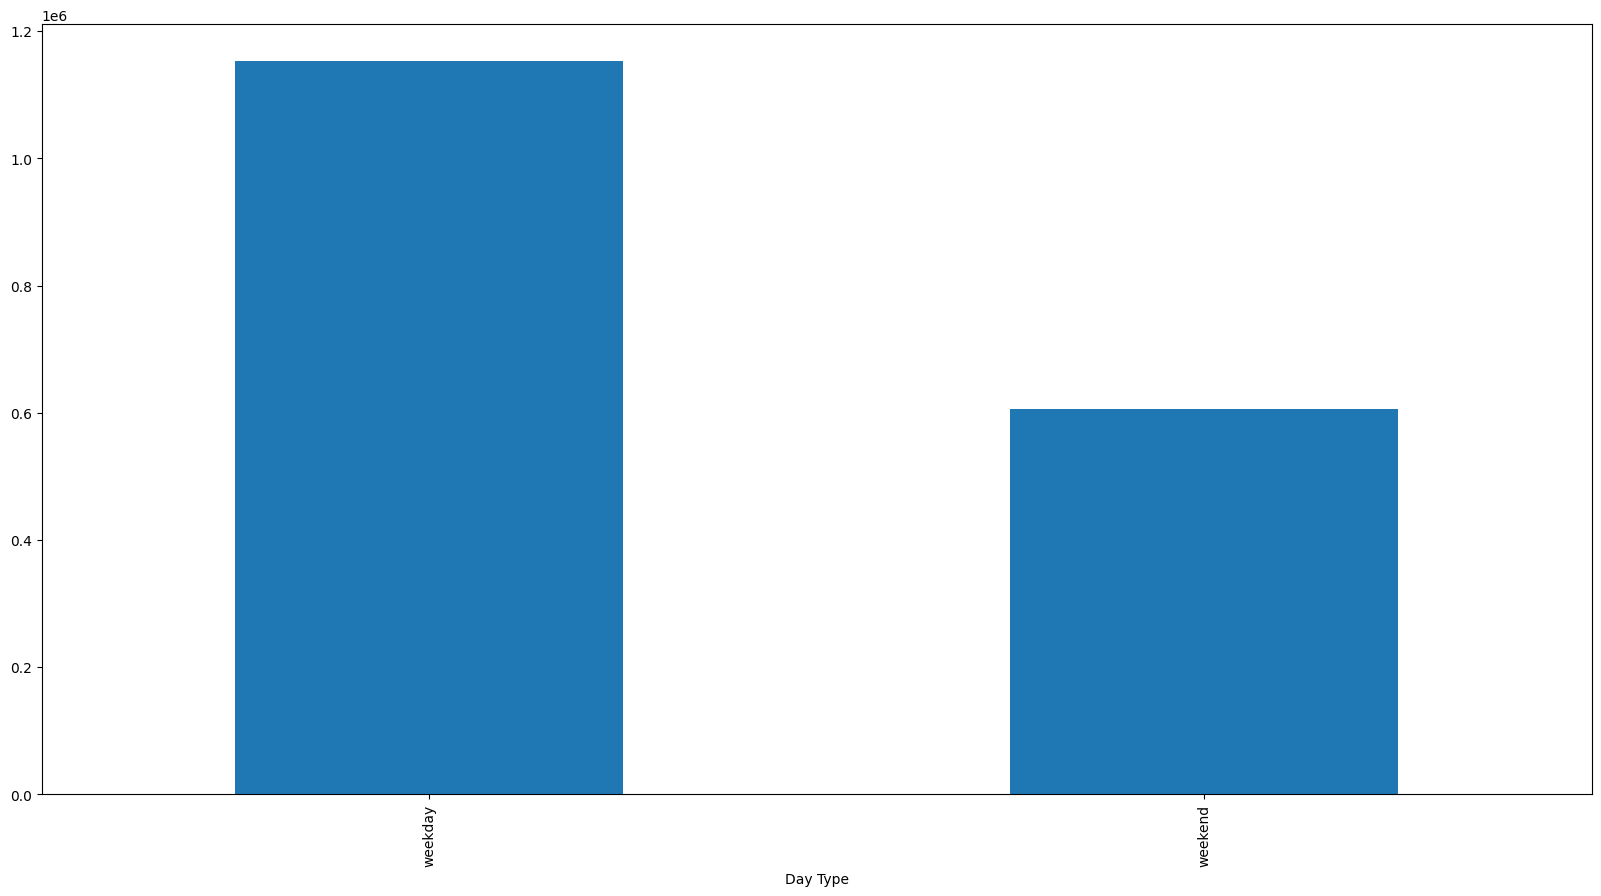

In [149]:
events['Day Type'] = events['Day Type'].str.replace('Russian holiday', 'weekend')
events['Day Type'].value_counts().plot(kind='bar', figsize=(20, 10))

# Item information

In [60]:
videos = pd.read_csv('video_info_v2.csv')
videos

,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535
...,...,...,...,...,...
481475,video_196126,14. Landscape Layer Blend,Дизайн,462000,1121338
481476,video_390909,Рихард Штраус: Завтра! — Людмила Рубинская,Музыка,227628,1043510
481477,video_326364,"Поймай Тинипин! Королевство эмоций, 2 серия. С...",Мультфильмы,744576,1002799
481478,video_374957,ВОРКУТА. 1 СЕРИЯ. УЖАСЫ. ПСИХОЛОГИЧЕСКИЙ ТРИЛЛЕР,Люди и блоги,2597385,1008386


In [61]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481480 entries, 0 to 481479
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   rutube_video_id  481480 non-null  object
 1   title            481480 non-null  object
 2   category         481480 non-null  object
 3   duration         481480 non-null  int64 
 4   author_id        481480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.4+ MB


<Axes: xlabel='category'>

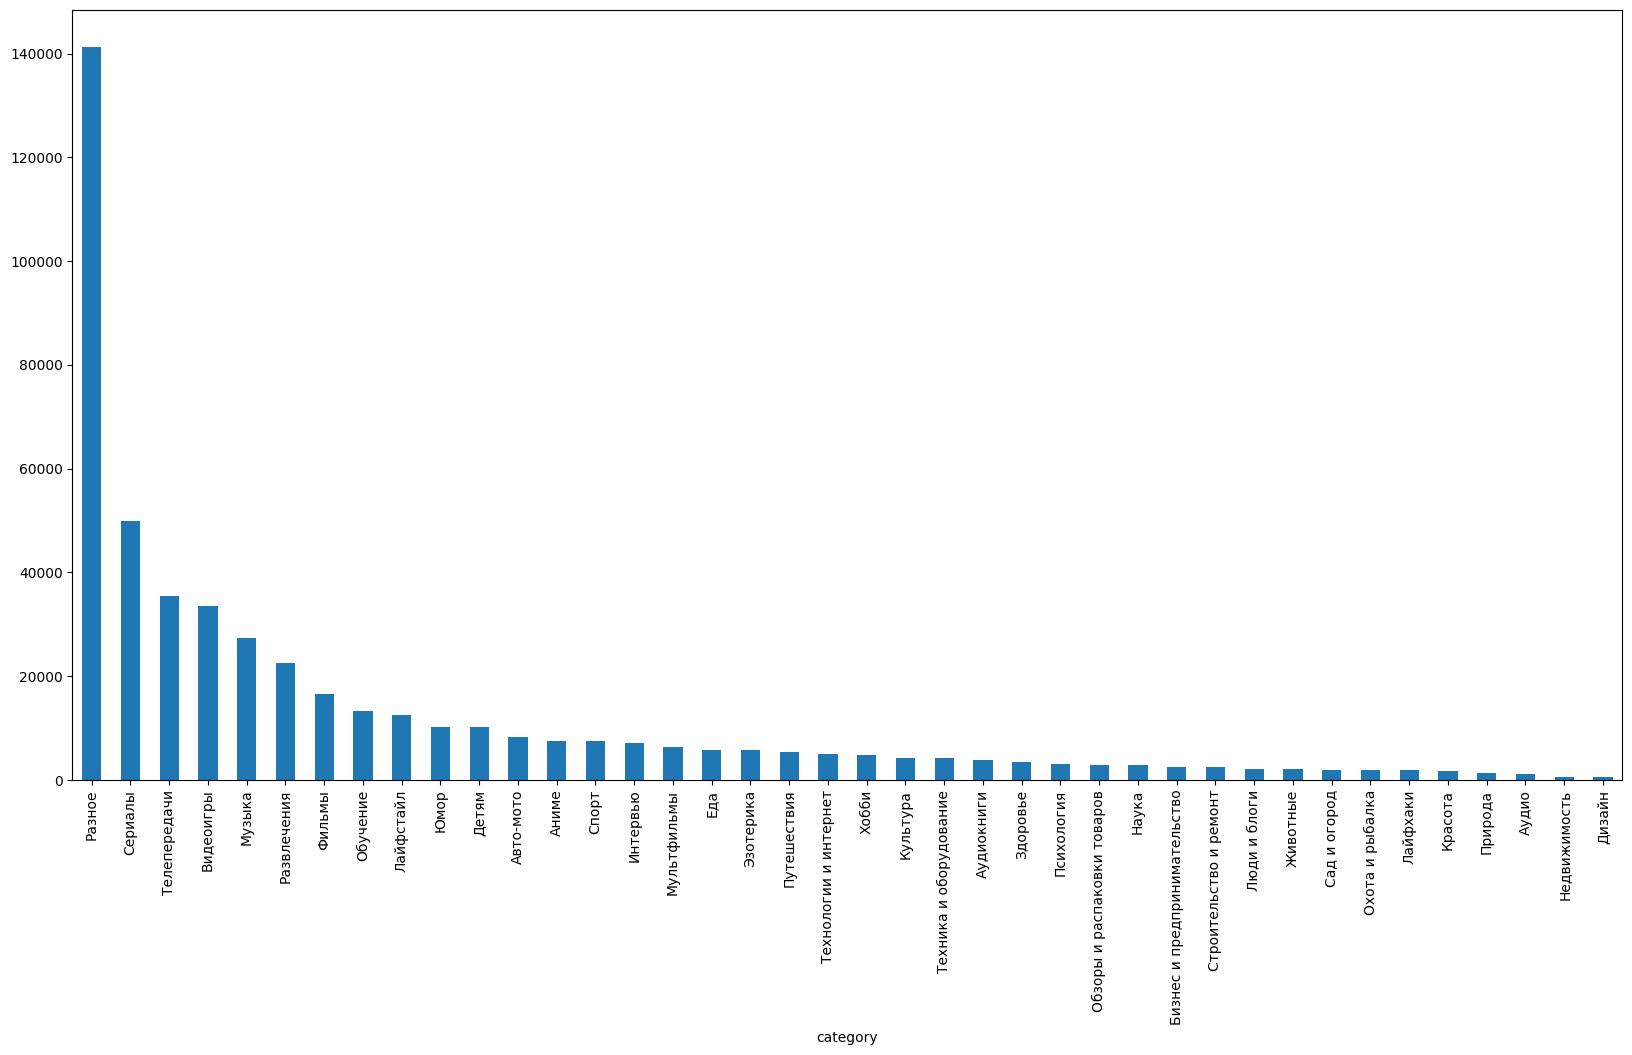

In [16]:
videos['category'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: ylabel='duration'>

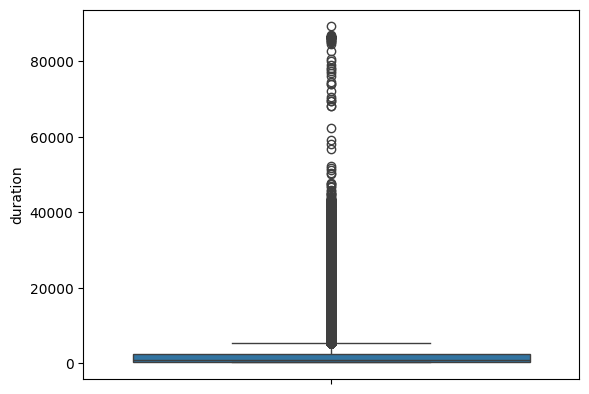

In [63]:
videos['duration'] = videos['duration'] / 1000 # перевод из милисекунд в секунды
sns.boxplot(videos['duration'])

<Axes: >

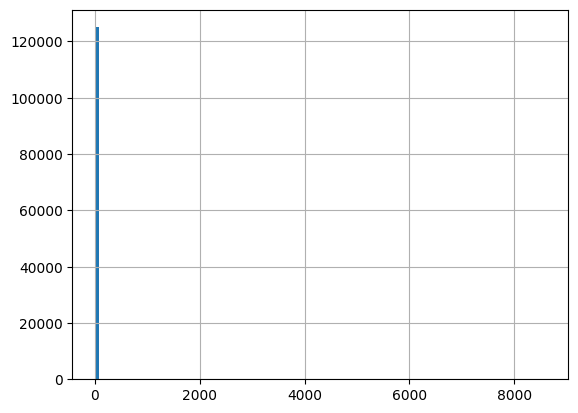

In [32]:
videos['author_id'].value_counts().hist(bins=100)

In [30]:
videos['author_id'].value_counts()

author_id
1095392    8603
1043618    8277
1009219    7391
1048955    5638
1000015    5308
           ... 
1113722       1
1124668       1
1034537       1
1092295       1
1039888       1
Name: count, Length: 125442, dtype: int64

Проведем анализ заголовков видео посредством облака слов

In [37]:
text = ' '.join(videos['title']).lower()
text[:100]

'как собрать букет из мыльных тюльпанов - силиконовые формы для мыла от таккруто - мыловарение осторо'

In [40]:
text = re.sub(r'==.*?==+', '', text)

In [41]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [45]:
STOPWORDS_RU = get_stop_words('russian')
STOPWORDS_ENG = get_stop_words('english')

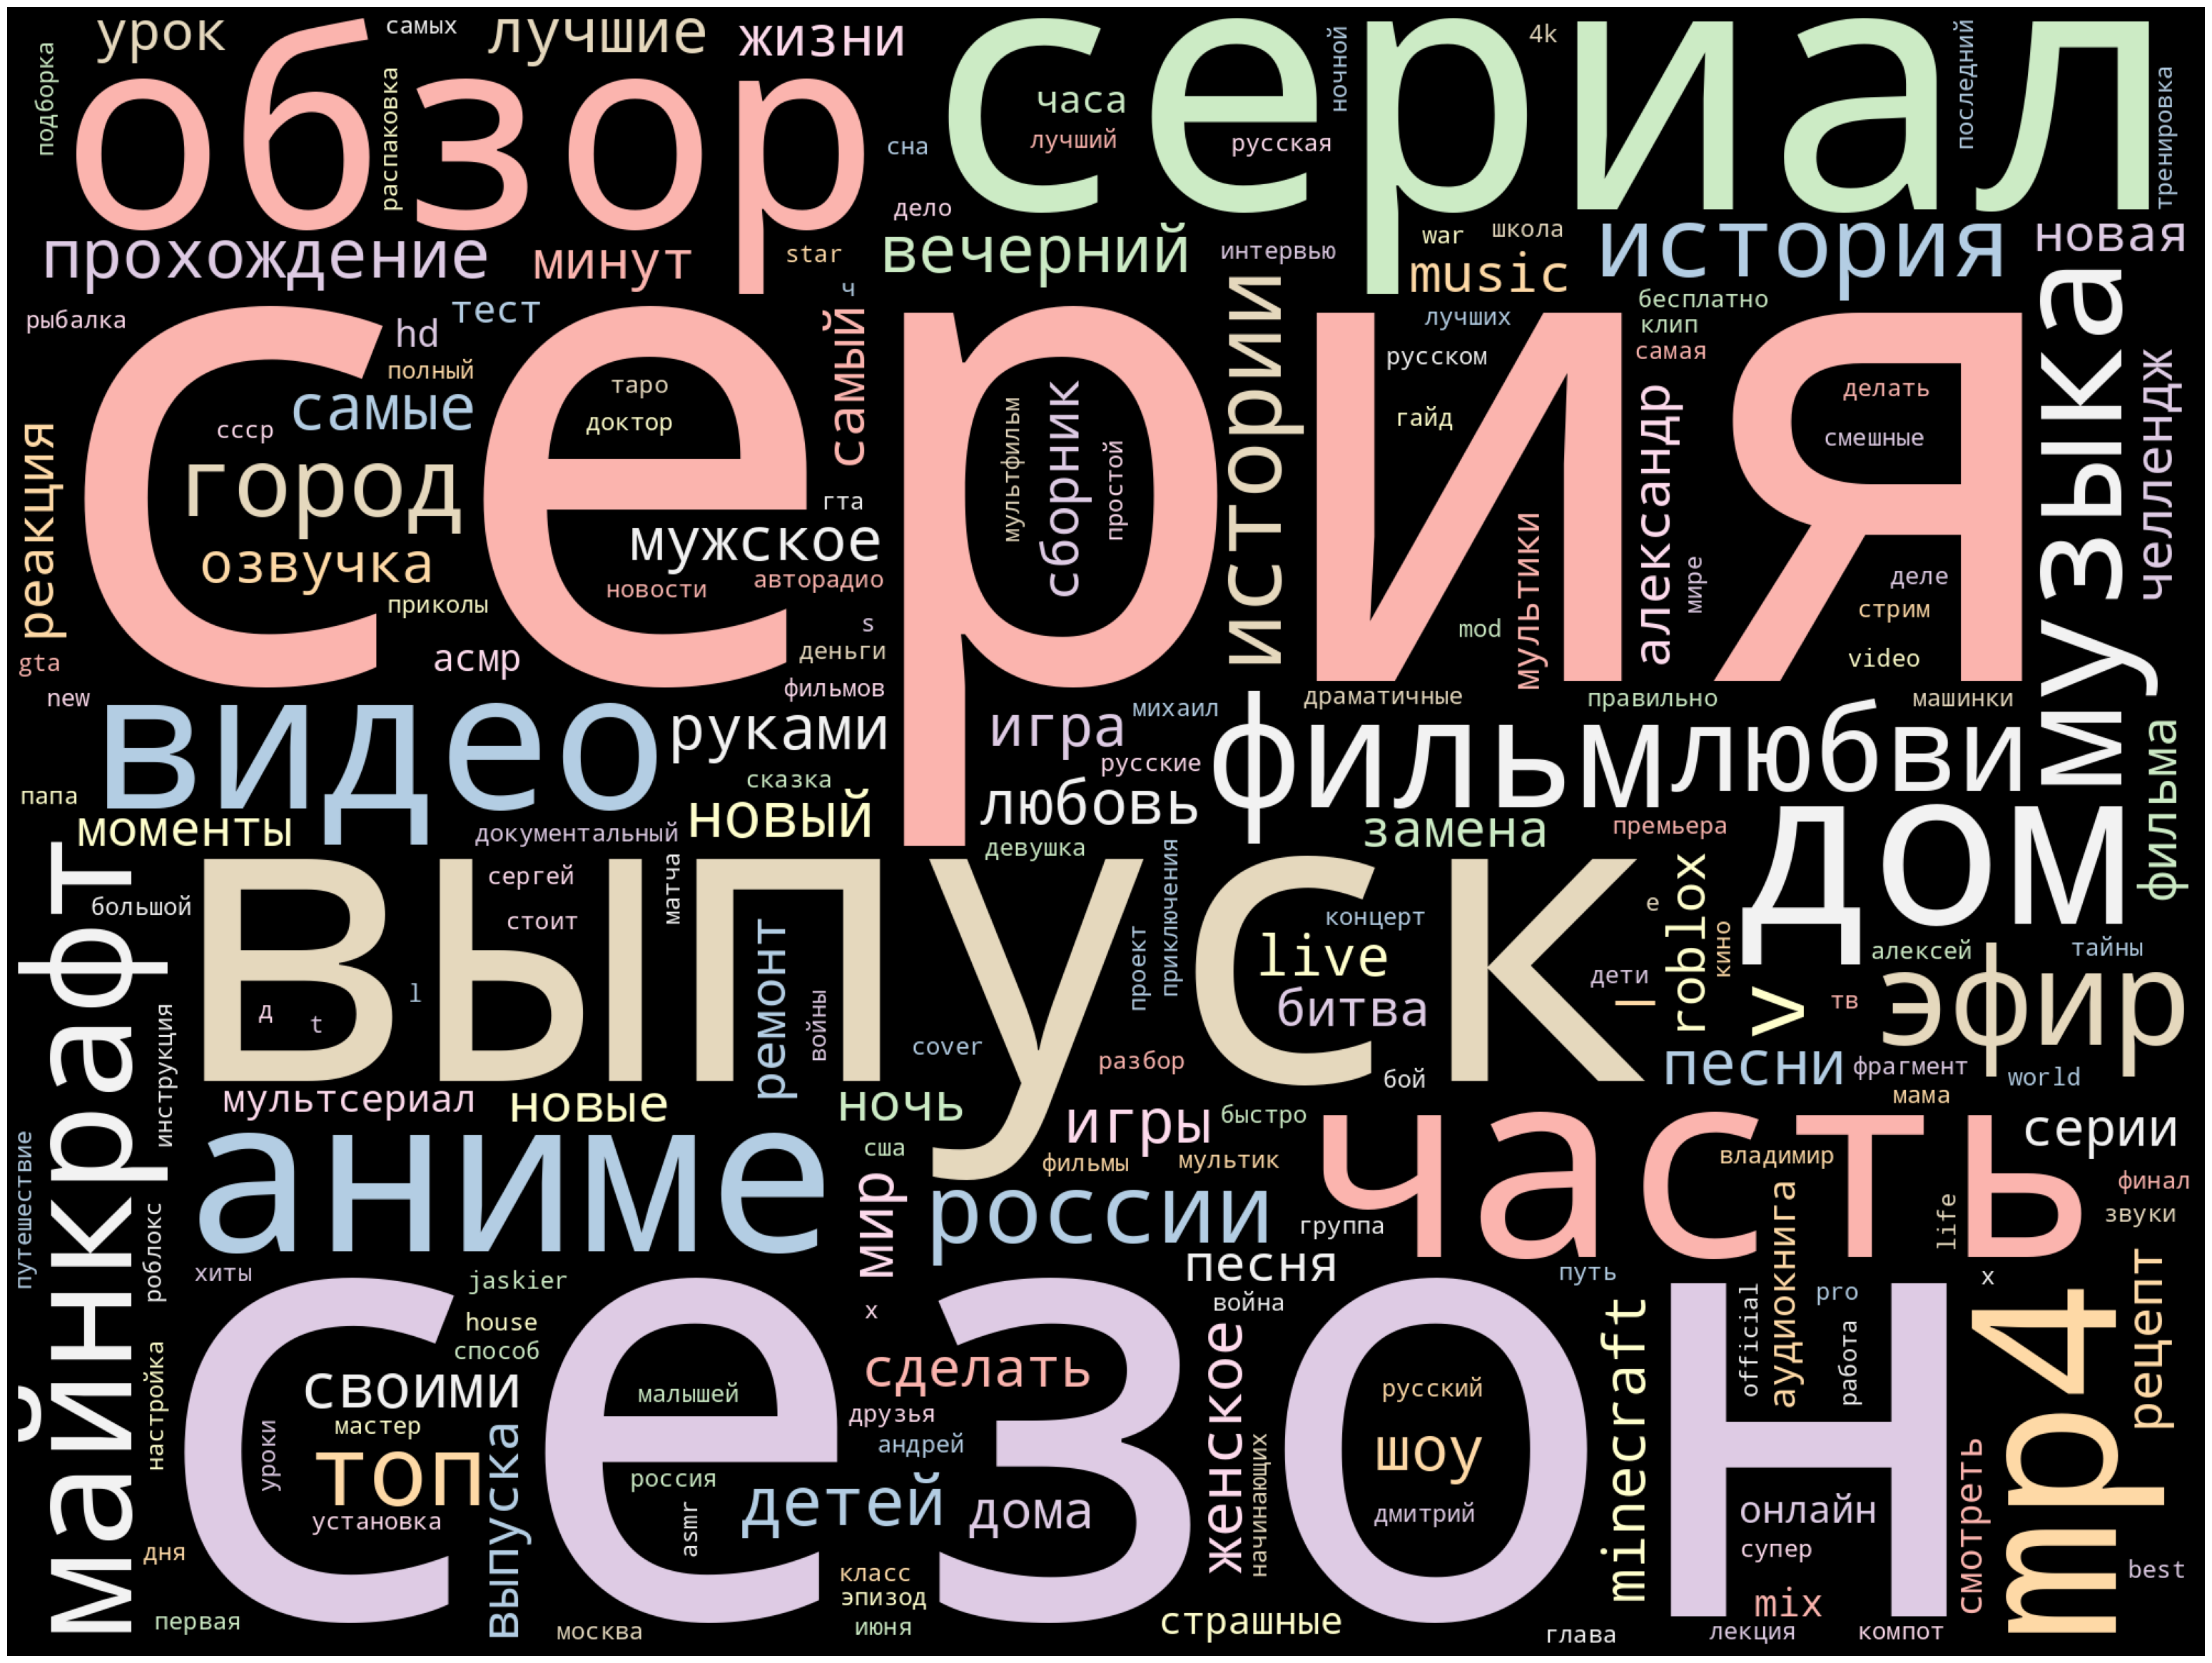

In [46]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20, colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS_RU + STOPWORDS_ENG).generate(text)

plot_cloud(wordcloud)

# Info + train

In [65]:
new_data = events.merge(videos, on='rutube_video_id')
new_data['how_many_times_watche'] =  new_data['total_watchtime'] / new_data['duration']
new_data

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,category,duration,author_id,how_many_times_watche
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456.534,1009219,1.304585
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519.211,1006760,1.014084
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518.280,1009257,0.977206
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Сергей Орлов-снял дом!!!,Разное,1522.069,1058671,1.000703
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249.920,1020020,17.604507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 17:08:36+03:00,Moscow,smartphone,mobile app,Android,Rutube,4230,video_162776,10026914,"Я знаю, но 1 сезон 3 серия",Сериалы,4480.915,1095392,1.059318
1759612,2024-06-30 01:20:16+03:00,Moscow,smartphone,browser,Android,Firefox Mobile,382,video_316157,10417567,РЕАКЦИЯ ЮРИСТА НА TikTok | НЕАДЕКВАТНЫЕ СОТРУД...,Обучение,320.134,1033688,0.838047
1759613,2024-06-30 22:37:04+03:00,St.-Petersburg,desktop,browser,Windows,Microsoft Edge,1342,video_83304,10009094,Свои чужие дети. Мужское / Женское. Выпуск от ...,Телепередачи,3125.675,1009219,2.329117
1759614,2024-06-30 11:33:09+03:00,St.-Petersburg,smartphone,mobile app,Android,Rutube,801,video_132769,10574374,"Коля, Коля, Николай. Мужское / Женское. Выпуск...",Телепередачи,2401.283,1009219,2.997856


<Axes: ylabel='how_many_times_watche'>

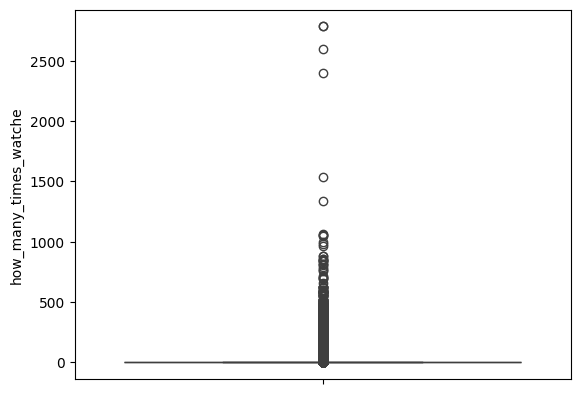

In [66]:
sns.boxplot(new_data['how_many_times_watche'])

# Target

In [48]:
target = pd.read_csv('train_targets.csv')
target

,viewer_uid,age,sex,age_class
0,10087154,30,male,1
1,10908708,25,female,1
2,10190464,34,male,2
3,10939673,25,male,1
4,10288257,48,male,3
...,...,...,...,...
180007,10237402,43,female,3
180008,10796936,32,male,2
180009,10684284,28,male,1
180010,10031093,50,female,3


In [169]:
target = target.merge(pd.DataFrame(events['viewer_uid'].value_counts()).reset_index(), on='viewer_uid')

In [191]:
target.to_csv('train_targets.csv', index=False)

In [145]:
min(target.viewer_uid)

10000001

In [86]:
target[target['viewer_uid'] == 10452976]

,viewer_uid,age,sex,age_class
146227,10452976,38,female,2


<Axes: xlabel='sex'>

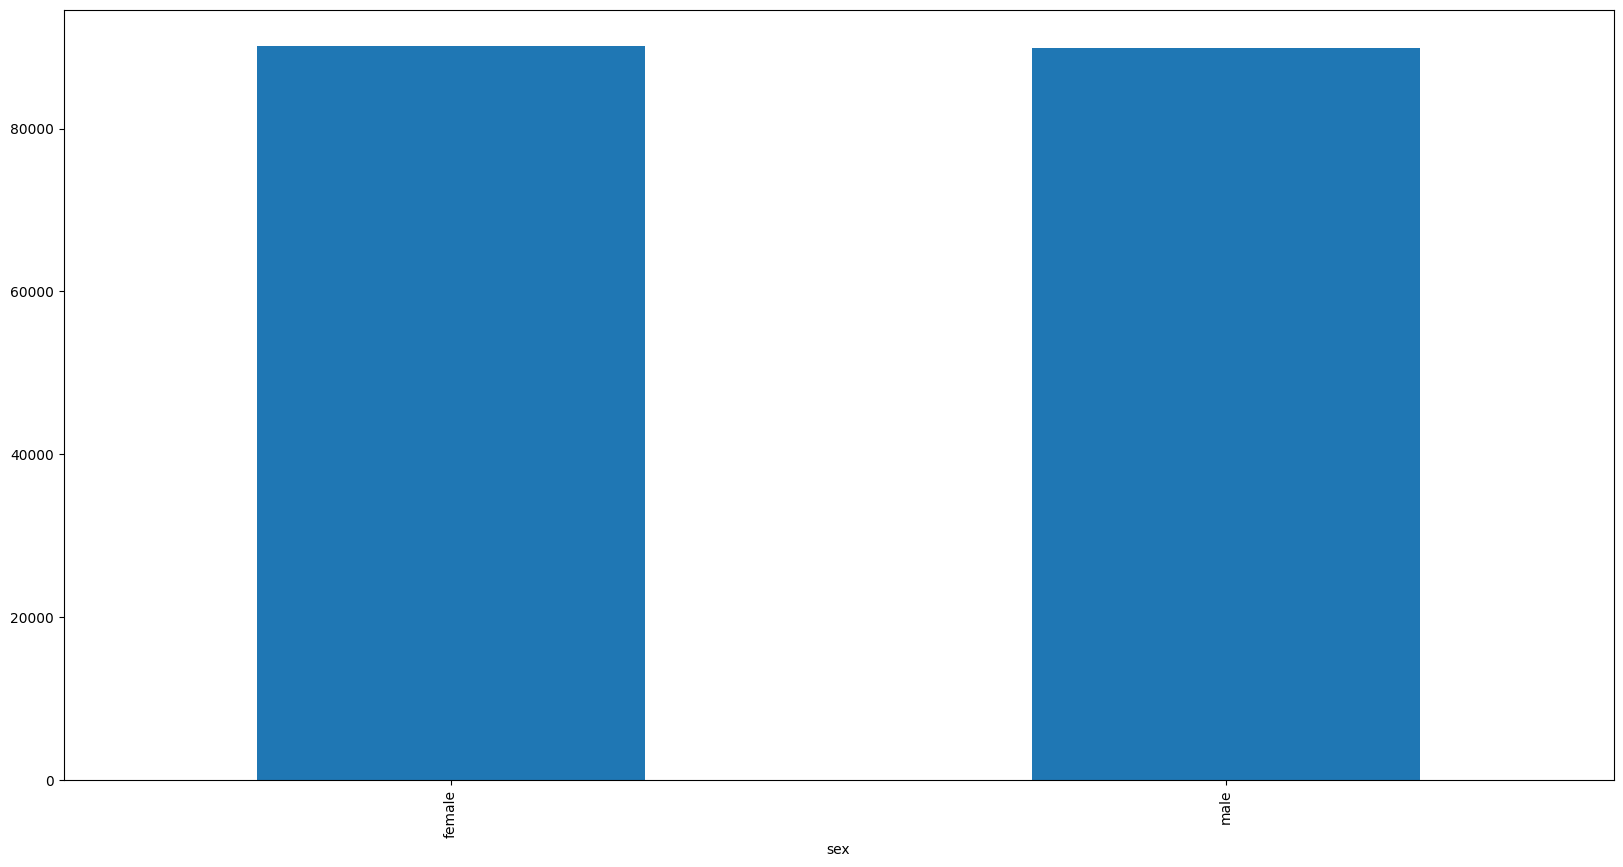

In [50]:
target['sex'].value_counts().plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='age_class'>

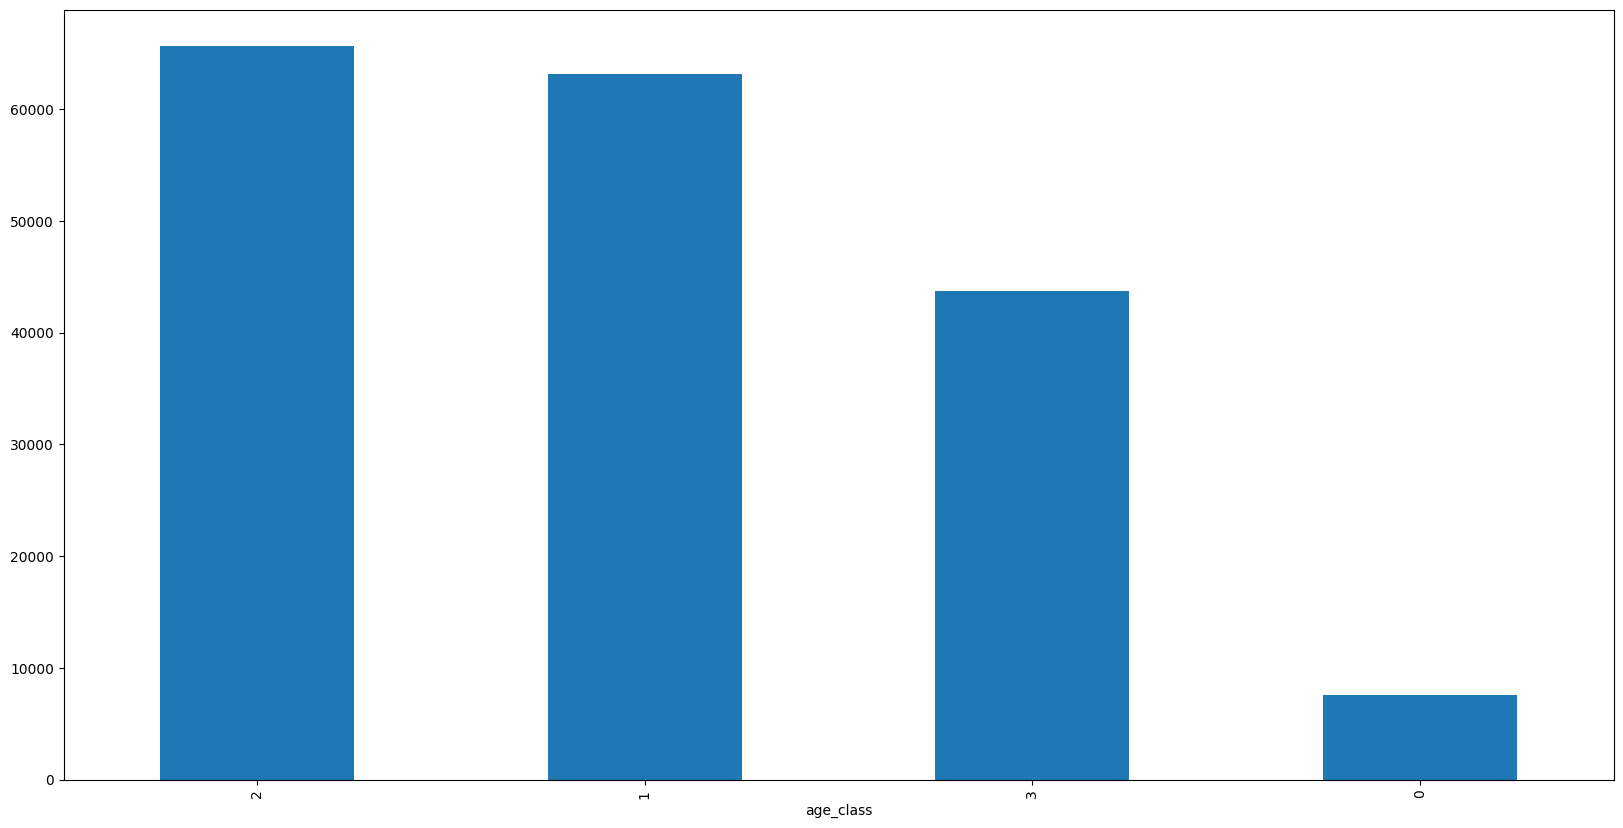

In [51]:
target['age_class'].value_counts().plot(kind='bar', figsize=(20, 10))

# Train-Test split

In [153]:
from replay.splitters import NewUsersSplitter

In [154]:
train, test = NewUsersSplitter(test_size=0.1, query_column="viewer_uid", timestamp_column='event_timestamp').split(events)
test

,event_timestamp,ua_device_type,ua_client_type,total_watchtime,rutube_video_id,viewer_uid,title,category,duration,author_id,...,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type,how_many_times_watche
0,2024-06-24 09:42:51+00:00,smartphone,mobile app,9680,video_54649,10049696,"Новая Битва экстрасенсов, 24 сезон, 13 выпуск",Телепередачи,5642240,1009257,...,female,1,59.937500,30.308611,0,2024-06-24,09:42:51,morning,weekday,1.715631
1,2024-06-24 13:19:01+00:00,tablet,mobile app,5339,video_298886,10107307,"Новая Битва экстрасенсов, 24 сезон, 8 выпуск",Телепередачи,5610840,1009257,...,female,1,55.751244,37.618423,0,2024-06-24,13:19:01,day,weekday,0.951551
2,2024-06-24 20:29:29+00:00,smartphone,browser,1787,video_101079,10172668,Кто хочет стать миллионером? Выпуск от 08.06.2024,Телепередачи,2881089,1009219,...,male,3,44.962321,43.280903,0,2024-06-24,20:29:29,evening,weekday,0.620252
3,2024-06-24 11:08:21+00:00,smartphone,browser,5641,video_405838,11120019,Кот в сапогах 2: Последнее желание (2022),Фильмы,6141846,1071673,...,female,1,55.751244,37.618423,0,2024-06-24,11:08:21,day,weekday,0.918454
4,2024-06-24 17:40:54+00:00,desktop,browser,94,video_414233,10030577,Сумеречные охотники 3 сезон 10 серия «Я гряду»...,Сериалы,2527649,1043618,...,female,1,54.565762,86.927486,4,2024-06-24,21:40:54,evening,weekday,0.037189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53734,2024-06-30 13:09:27+00:00,smartphone,mobile app,90,video_29328,10013064,Монсики – 78 серия — Храбрая песня — Союзмульт...,Мультфильмы,392960,1000005,...,female,1,59.937500,30.308611,0,2024-06-30,13:09:27,day,weekend,0.229031
53735,2024-06-30 10:39:20+00:00,desktop,browser,590,video_55153,10101730,Поднятие уровня в одиночку 9 серия «Так ты скр...,Аниме,1420087,1048955,...,female,1,55.688713,37.901073,0,2024-06-30,10:39:20,morning,weekend,0.415468
53736,2024-06-30 11:12:29+00:00,tablet,mobile app,151,video_313834,11121168,Лок и ключ / Locke & Key – 2 сезон 1 серия,Сериалы,3192225,1056476,...,female,2,48.465093,135.059569,7,2024-06-30,18:12:29,evening,weekend,0.047302
53737,2024-06-30 13:48:10+00:00,desktop,browser,462,video_80615,10121498,Последний ролик на RuTube,Видеоигры,1288439,1017048,...,male,2,55.966670,40.621475,0,2024-06-30,13:48:10,day,weekend,0.358573


In [155]:
test.time_zone.unique()

array([ 0,  4,  2,  5,  1,  6,  3, -1,  7,  9,  8])

In [156]:
train.time_zone.unique()

array([ 2,  0,  4,  3,  1,  7,  6,  5, -1,  9,  8])

<Axes: >

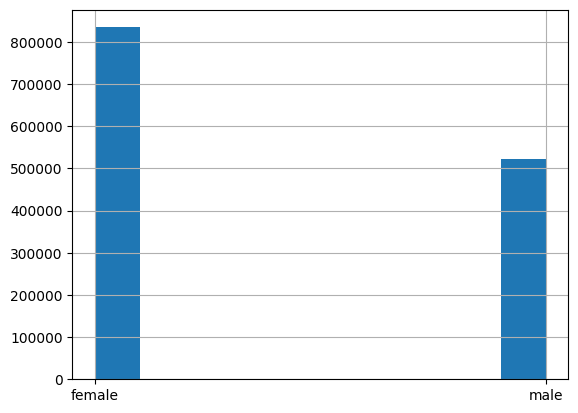

In [157]:
train.sex.hist()

<Axes: >

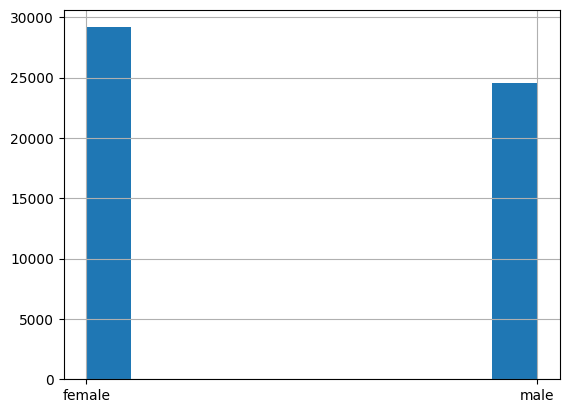

In [158]:
test.sex.hist()

<Axes: >

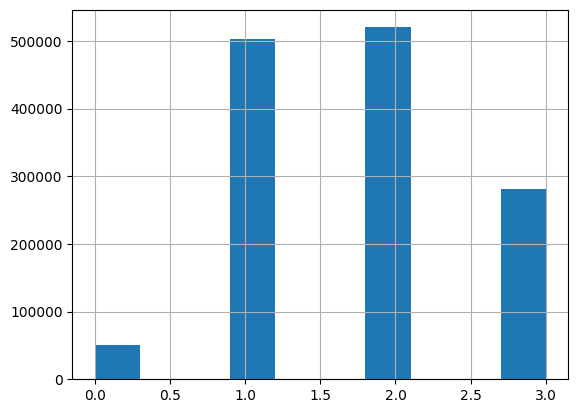

In [159]:
train.age_class.hist()

<Axes: >

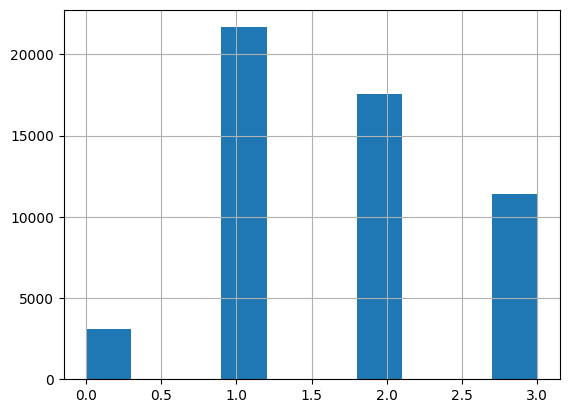

In [160]:
test.age_class.hist()

In [161]:
len(test.viewer_uid.unique()), len(train.viewer_uid.unique())

(18002, 162010)

In [162]:
min(train.viewer_uid)

10000001

In [163]:
set(test.viewer_uid.values) & set(train.viewer_uid.values)

set()

In [164]:
pd.DataFrame(test.viewer_uid.unique()).to_csv('events_valid.csv')
pd.DataFrame(train.viewer_uid.unique()).to_csv('events_train.csv')

# Save day

In [150]:
events[events['viewer_uid'].isin(target['viewer_uid'])]

,event_timestamp,ua_device_type,ua_client_type,total_watchtime,rutube_video_id,viewer_uid,title,category,duration,author_id,age,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type
0,2024-06-01 03:40:58+00:00,desktop,browser,1883,video_133074,10067243,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219,20,female,0,55.164440,61.436844,2,2024-06-01,05:40:58,morning,weekend
1,2024-06-01 16:33:24+00:00,smartphone,mobile app,512,video_362960,10245341,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760,40,female,2,54.733334,56.000000,2,2024-06-01,18:33:24,evening,weekend
2,2024-06-01 18:30:43+00:00,desktop,browser,5647,video_96775,10894333,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257,23,male,1,59.937500,30.308611,0,2024-06-01,18:30:43,evening,weekend
3,2024-06-01 20:03:42+00:00,smartphone,mobile app,1521,video_161610,10029092,Сергей Орлов-снял дом!!!,Разное,1522069,1058671,41,male,3,55.751244,37.618423,0,2024-06-01,20:03:42,evening,weekend
4,2024-06-01 19:48:09+00:00,smartphone,mobile app,71,video_116245,10452976,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020,38,female,2,55.751244,37.618423,0,2024-06-01,19:48:09,evening,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 14:08:36+00:00,smartphone,mobile app,4230,video_162776,10026914,"Я знаю, но 1 сезон 3 серия",Сериалы,4480915,1095392,32,female,2,55.751244,37.618423,0,2024-06-30,14:08:36,day,weekend
1759612,2024-06-29 22:20:16+00:00,smartphone,browser,382,video_316157,10417567,РЕАКЦИЯ ЮРИСТА НА TikTok | НЕАДЕКВАТНЫЕ СОТРУД...,Обучение,320134,1033688,48,male,3,55.751244,37.618423,0,2024-06-29,22:20:16,evening,weekend
1759613,2024-06-30 19:37:04+00:00,desktop,browser,1342,video_83304,10009094,Свои чужие дети. Мужское / Женское. Выпуск от ...,Телепередачи,3125675,1009219,28,male,1,59.937500,30.308611,0,2024-06-30,19:37:04,evening,weekend
1759614,2024-06-30 08:33:09+00:00,smartphone,mobile app,801,video_132769,10574374,"Коля, Коля, Николай. Мужское / Женское. Выпуск...",Телепередачи,2401283,1009219,43,female,3,59.937500,30.308611,0,2024-06-30,08:33:09,morning,weekend


In [151]:
events['how_many_times_watche'] =  events['total_watchtime'] / new_data['duration']
save_file = events.drop(columns=['age', 'sex', 'age_class', 'title', 'rutube_video_id', 'author_id', 'date', 'time', 'total_watchtime'])
save_file

,event_timestamp,ua_device_type,ua_client_type,viewer_uid,category,duration,latitude,longitude,time_zone,time of day,Day Type,how_many_times_watche
0,2024-06-01 03:40:58+00:00,desktop,browser,10067243,Телепередачи,2456534,55.164440,61.436844,2,morning,weekend,0.766527
1,2024-06-01 16:33:24+00:00,smartphone,mobile app,10245341,Юмор,519211,54.733334,56.000000,2,evening,weekend,0.986112
2,2024-06-01 18:30:43+00:00,desktop,browser,10894333,Телепередачи,5518280,59.937500,30.308611,0,evening,weekend,1.023326
3,2024-06-01 20:03:42+00:00,smartphone,mobile app,10029092,Разное,1522069,55.751244,37.618423,0,evening,weekend,0.999298
4,2024-06-01 19:48:09+00:00,smartphone,mobile app,10452976,Путешествия,1249920,55.751244,37.618423,0,evening,weekend,0.056804
...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 14:08:36+00:00,smartphone,mobile app,10026914,Сериалы,4480915,55.751244,37.618423,0,day,weekend,0.944004
1759612,2024-06-29 22:20:16+00:00,smartphone,browser,10417567,Обучение,320134,55.751244,37.618423,0,evening,weekend,1.193250
1759613,2024-06-30 19:37:04+00:00,desktop,browser,10009094,Телепередачи,3125675,59.937500,30.308611,0,evening,weekend,0.429347
1759614,2024-06-30 08:33:09+00:00,smartphone,mobile app,10574374,Телепередачи,2401283,59.937500,30.308611,0,morning,weekend,0.333572


In [152]:
save_file.to_csv('data_to_coles.csv')

In [ ]:
best_tr = 0
best_ac = 0
for tr in np.linspace(0.0, 1.0, 401):
    if True:
        f1 = f1_score(y_test, test_pred[:, n] > tr)
        if best_f1 < f1:
            best_ac = f1
            best_tr = tr

# Agg

In [187]:
author_median_age = events.groupby('author_id')['age'].median() 
author_median_age.rename('med_age', inplace=True) 
try:
    events = events.join(author_median_age, on='author_id', how='left')
except:
    pass
variables = ['total_watchtime', 'latitude', 'longitude', 'duration', 'how_many_times_watche','med_age'] 

# Вычисление квантилей для каждого пользователя 
quantiles = events.groupby('viewer_uid')[variables].quantile([0, 0.25, 0.5, 0.75, 1]) 
quantiles = quantiles.unstack(level=-1) 
quantiles.columns = [f'{col[0]}_q{int(col[1] * 4)}' for col in quantiles.columns] 
 
# Агрегация по метрикам: сумма, среднее, медиана и т.д. 
aggregated = events.groupby('viewer_uid')[variables].agg(['sum', 'mean', 'median', 'min', 'max', 'prod']).fillna(0) 
 
# Преобразование имен столбцов для удобства (если требуется) 
aggregated.columns = ['_'.join(col).strip() for col in aggregated.columns.values] 
 
# Объединение квантильных данных и агрегированных данных 
result = pd.concat([quantiles, aggregated], axis=1) 
 
# Пример вывода для проверки результата 
result.head()

,total_watchtime_q0,total_watchtime_q1,total_watchtime_q2,total_watchtime_q3,total_watchtime_q4,latitude_q0,latitude_q1,latitude_q2,latitude_q3,latitude_q4,...,how_many_times_watche_median,how_many_times_watche_min,how_many_times_watche_max,how_many_times_watche_prod,med_age_sum,med_age_mean,med_age_median,med_age_min,med_age_max,med_age_prod
viewer_uid,,,,,,,,,,,,,,,,,,,,,
10000001,562.0,2187.50,4003.0,4953.5,6932.0,55.751244,55.751244,55.751244,55.751244,55.751244,...,0.862727,0.117972,1.577017,0.000094,589.0,31.000000,31.0,31.0,31.0,2.167066e+28
10000002,80.0,1190.00,1210.0,1310.0,6688.0,55.751244,55.751244,55.751244,55.751244,55.751244,...,0.995174,0.010093,0.999802,0.006497,299.0,33.222222,33.0,33.0,34.0,4.926692e+13
10000004,81.0,481.75,613.0,2425.0,4778.0,55.751244,55.751244,55.751244,59.226973,59.937500,...,0.496560,0.082067,1.890750,0.000100,468.0,39.000000,39.0,39.0,39.0,1.238156e+19
10000005,212.0,212.00,212.0,212.0,212.0,55.349427,55.349427,55.349427,55.349427,55.349427,...,0.403739,0.403739,0.403739,0.403739,42.0,42.000000,42.0,42.0,42.0,4.200000e+01
10000006,971.0,971.00,971.0,971.0,971.0,59.127117,59.127117,59.127117,59.127117,59.127117,...,0.821611,0.821611,0.821611,0.821611,32.0,32.000000,32.0,32.0,32.0,3.200000e+01


In [188]:
result = result.reset_index()
result

,viewer_uid,total_watchtime_q0,total_watchtime_q1,total_watchtime_q2,total_watchtime_q3,total_watchtime_q4,latitude_q0,latitude_q1,latitude_q2,latitude_q3,...,how_many_times_watche_median,how_many_times_watche_min,how_many_times_watche_max,how_many_times_watche_prod,med_age_sum,med_age_mean,med_age_median,med_age_min,med_age_max,med_age_prod
0,10000001,562.0,2187.50,4003.0,4953.50,6932.0,55.751244,55.751244,55.751244,55.751244,...,0.862727,0.117972,1.577017,0.000094,589.0,31.000000,31.0,31.0,31.0,2.167066e+28
1,10000002,80.0,1190.00,1210.0,1310.00,6688.0,55.751244,55.751244,55.751244,55.751244,...,0.995174,0.010093,0.999802,0.006497,299.0,33.222222,33.0,33.0,34.0,4.926692e+13
2,10000004,81.0,481.75,613.0,2425.00,4778.0,55.751244,55.751244,55.751244,59.226973,...,0.496560,0.082067,1.890750,0.000100,468.0,39.000000,39.0,39.0,39.0,1.238156e+19
3,10000005,212.0,212.00,212.0,212.00,212.0,55.349427,55.349427,55.349427,55.349427,...,0.403739,0.403739,0.403739,0.403739,42.0,42.000000,42.0,42.0,42.0,4.200000e+01
4,10000006,971.0,971.00,971.0,971.00,971.0,59.127117,59.127117,59.127117,59.127117,...,0.821611,0.821611,0.821611,0.821611,32.0,32.000000,32.0,32.0,32.0,3.200000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,1475.0,1475.00,1475.0,1475.00,1475.0,59.937500,59.937500,59.937500,59.937500,...,3.873221,3.873221,3.873221,3.873221,38.0,38.000000,38.0,38.0,38.0,3.800000e+01
180008,11140869,1305.0,1305.00,1305.0,1305.00,1305.0,59.937500,59.937500,59.937500,59.937500,...,3.426816,3.426816,3.426816,3.426816,38.0,38.000000,38.0,38.0,38.0,3.800000e+01
180009,11140872,43.0,49.75,62.0,74.75,83.0,54.853280,54.853280,54.853280,54.853280,...,0.164840,0.112819,0.227397,0.000668,160.0,40.000000,40.0,39.0,41.0,2.556801e+06
180010,11140875,1115.0,1115.00,1115.0,1115.00,1115.0,55.751244,55.751244,55.751244,55.751244,...,2.927892,2.927892,2.927892,2.927892,38.0,38.000000,38.0,38.0,38.0,3.800000e+01


In [190]:
result.to_csv('events_agg.csv', index=False)